# 이수안컴퓨터연구소 머신러닝 #9
## 앙상블(Ensemble)
* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것
### Bagging meta-estimator
* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작
#### Bagging 을 사용한 분류
* KNN
* SVC
* Decision Tree
#### Bagging 을 사용한 회귀
* KNN
* SVR
* Decision Tree
#### Forests of randomized trees
* Random Forest 분류
* Random Forest 회귀
* Extremely Randomized Trees 분류
* Extremely Randomized Trees 회귀
* Random Forest, Extra Tree 시각화
#### AdaBoost
* AdaBoost 분류
* AdaBoost 회귀
#### Gradient Tree Boosting
* Gradient Tree Boosting 분류
* Gradient Tree Boosting 회귀
#### 투표 기반 분류 (Voting Classifier)
* 결정 경계 시각화
#### 투표 기반 회귀 (Voting Regressor)
* 회귀식 시각화
#### 스택 일반화 (Stacked Generalization)
* 스택 회귀
  * 회귀식 시각화
* 스택 분류
  * 결정 경계 시각화

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

## Bagging을 사용한 분류
#### 데이터셋 불러오기

In [5]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

### KNN
#### 붓꽃 데이터

In [6]:
# 배깅모델과 비교할 기본모델 정의
base_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# 배깅모델 정의
bagging_model = BaggingClassifier(base_model, n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

In [7]:
cross_val = cross_validate(estimator=base_model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0004002094268798828 (+/- 0.0004901544488522248)
avg score time: 0.0013038158416748048 (+/- 0.0004053297207084491)
avg test score: 0.96 (+/- 0.024944382578492935)


In [8]:
cross_val = cross_validate(estimator=bagging_model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010166597366333009 (+/- 0.0005394477421868169)
avg score time: 0.0039032459259033202 (+/- 0.0004920467501821386)
avg test score: 0.9400000000000001 (+/- 0.044221663871405324)


#### 와인 데이터

In [9]:
cross_val = cross_validate(estimator=base_model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0 (+/- 0.0)
avg score time: 0.001804685592651367 (+/- 0.0004016117930500186)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [10]:
cross_val = cross_validate(estimator=bagging_model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.011849212646484374 (+/- 0.0009438035764334056)
avg score time: 0.0037658214569091797 (+/- 0.00046320431314010097)
avg test score: 0.9609523809523809 (+/- 0.03763411392091284)


#### 유방암 데이터

In [11]:
cross_val = cross_validate(estimator=base_model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0008004188537597656 (+/- 0.00040020972515155534)
avg score time: 0.019653177261352538 (+/- 0.018965761400014006)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [12]:
cross_val = cross_validate(estimator=bagging_model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010972356796264649 (+/- 0.00048178746309041)
avg score time: 0.007709312438964844 (+/- 0.000397309390407022)
avg test score: 0.9578326346840553 (+/- 0.011600435443858168)


### SVC
#### 붓꽃 데이터

In [13]:
# 배깅모델과 비교할 기본모델 정의
base_model = make_pipeline(StandardScaler(), SVC())

# 배깅모델 정의
bagging_model = BaggingClassifier(base_model, n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

In [14]:
cross_val = cross_validate(estimator=base_model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0008597850799560546 (+/- 0.0004451102956834598)
avg score time: 0.00020008087158203126 (+/- 0.0004001617431640626)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [15]:
cross_val = cross_validate(estimator=bagging_model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.014724159240722656 (+/- 0.0005529097739075372)
avg score time: 0.0020041465759277344 (+/- 0.00031880545741950366)
avg test score: 0.96 (+/- 0.024944382578492935)


#### 와인 데이터

In [16]:
cross_val = cross_validate(estimator=base_model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0006031513214111329 (+/- 0.0004925025094005284)
avg score time: 0.0005007743835449219 (+/- 0.0006335785509509174)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [17]:
cross_val = cross_validate(estimator=bagging_model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.015427064895629884 (+/- 0.0005918492242814131)
avg score time: 0.0029018878936767577 (+/- 0.0001990097231941808)
avg test score: 0.9552380952380952 (+/- 0.013219468453115573)


#### 유방암 데이터

In [18]:
cross_val = cross_validate(estimator=base_model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.002556467056274414 (+/- 0.00043234663944400394)
avg score time: 0.0014034271240234374 (+/- 0.00048759122517411064)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [19]:
cross_val = cross_validate(estimator=bagging_model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01934394836425781 (+/- 0.0008735131681063344)
avg score time: 0.007009315490722656 (+/- 0.0004460844211061699)
avg test score: 0.9701133364384411 (+/- 0.007065058772655673)


### Decision Tree
#### 붓꽃 데이터

In [20]:
# 배깅모델과 비교할 기본모델 정의
base_model = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# 배깅모델 정의
bagging_model = BaggingClassifier(base_model, n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

In [21]:
cross_val = cross_validate(estimator=base_model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.000782632827758789 (+/- 0.00048498801454609415)
avg score time: 0.00019993782043457032 (+/- 0.00039987564086914064)
avg test score: 0.9600000000000002 (+/- 0.03265986323710903)


In [22]:
cross_val = cross_validate(estimator=bagging_model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01329340934753418 (+/- 0.0006206758997755831)
avg score time: 0.0013010978698730468 (+/- 0.00040027355017632077)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


#### 와인 데이터

In [23]:
cross_val = cross_validate(estimator=base_model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0009008407592773438 (+/- 0.0004907298578690531)
avg score time: 0.0004086017608642578 (+/- 0.0005006028616981395)
avg test score: 0.8819047619047617 (+/- 0.04163876616895077)


In [24]:
cross_val = cross_validate(estimator=bagging_model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.013569831848144531 (+/- 0.0005938931096749462)
avg score time: 0.0014004707336425781 (+/- 0.0004903687941873826)
avg test score: 0.9609523809523809 (+/- 0.03763411392091284)


#### 유방암 데이터

In [25]:
cross_val = cross_validate(estimator=base_model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005044460296630859 (+/- 0.0006506717430777852)
avg score time: 0.00020008087158203126 (+/- 0.0004001617431640626)
avg test score: 0.9190964136003726 (+/- 0.024082078672294737)


In [26]:
cross_val = cross_validate(estimator=bagging_model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020069313049316407 (+/- 0.0005904875438980905)
avg score time: 0.0017014026641845703 (+/- 0.0003996292085461983)
avg test score: 0.947290793355069 (+/- 0.022161259734676298)


## Bagging을 사용한 회귀
#### 데이터셋 불러오기

In [27]:
boston = load_boston()
diabetes = load_diabetes()

### KNN
#### 보스턴 주택 가격 데이터

In [28]:
# 배깅모델과 비교할 기본모델 정의
base_model = make_pipeline(StandardScaler(), KNeighborsRegressor())

# 배깅모델 정의
bagging_model = BaggingRegressor(base_model, n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

In [29]:
cross_val = cross_validate(estimator=base_model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0010003089904785157 (+/- 0.0006321087900823919)
avg score time: 0.0010016918182373046 (+/- 0.0003157595571317505)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [30]:
cross_val = cross_validate(estimator=bagging_model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.010824346542358398 (+/- 0.0004034917197722976)
avg score time: 0.0048048973083496095 (+/- 0.00039985576173555247)
avg test score: 0.45112996753680534 (+/- 0.05933459904507454)


#### 당뇨병 데이터

In [31]:
cross_val = cross_validate(estimator=base_model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0004103660583496094 (+/- 0.0005028336439622653)
avg score time: 0.0011008739471435546 (+/- 0.00020126135669955707)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [32]:
cross_val = cross_validate(estimator=bagging_model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01003260612487793 (+/- 0.0007752477763199822)
avg score time: 0.004604482650756836 (+/- 0.00037327946342092524)
avg test score: 0.41027714918906233 (+/- 0.0370454495110943)


### SVR
#### 보스턴 주택 가격 데이터

In [33]:
# 배깅모델과 비교할 기본모델 정의
base_model = make_pipeline(StandardScaler(), SVR())

# 배깅모델 정의
bagging_model = BaggingRegressor(base_model, n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

In [34]:
cross_val = cross_validate(estimator=base_model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006412220001220703 (+/- 0.00037799138686295616)
avg score time: 0.003200387954711914 (+/- 0.00039124172390733833)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [35]:
cross_val = cross_validate(estimator=bagging_model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.023536157608032227 (+/- 0.0006569076530680474)
avg score time: 0.015005922317504883 (+/- 0.0003358749215640639)
avg test score: 0.09332891611684616 (+/- 0.31271068818074166)


#### 당뇨병 데이터

In [36]:
cross_val = cross_validate(estimator=base_model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004521989822387695 (+/- 0.0004698845539384983)
avg score time: 0.0027660369873046876 (+/- 0.000463152587149451)
avg test score: 0.14659868748701582 (+/- 0.021908831719954277)


In [37]:
cross_val = cross_validate(estimator=bagging_model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.019298791885375977 (+/- 0.0005941405533578382)
avg score time: 0.012738704681396484 (+/- 0.000782259968957592)
avg test score: 0.06343694769460795 (+/- 0.031161518876277303)


### Decision Tree
#### 보스턴 주택 가격 데이터

In [38]:
# 배깅모델과 비교할 기본모델 정의
base_model = make_pipeline(StandardScaler(), DecisionTreeRegressor())

# 배깅모델 정의
bagging_model = BaggingRegressor(base_model, n_estimators=10,
                                  max_samples=0.5, max_features=0.5)

In [39]:
cross_val = cross_validate(estimator=base_model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0025012969970703127 (+/- 0.00044718681040992685)
avg score time: 0.0002002716064453125 (+/- 0.000400543212890625)
avg test score: 0.0586623159022567 (+/- 0.9595694147224212)


In [40]:
cross_val = cross_validate(estimator=bagging_model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016797542572021484 (+/- 0.0008814311588556873)
avg score time: 0.0015261650085449218 (+/- 0.0004505564742288566)
avg test score: 0.2189394843107287 (+/- 0.4917706054722064)


#### 당뇨병 데이터

In [41]:
cross_val = cross_validate(estimator=base_model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0023035526275634764 (+/- 0.0004018790358658511)
avg score time: 0.0 (+/- 0.0)
avg test score: -0.138874872313072 (+/- 0.17336170460316216)


In [42]:
cross_val = cross_validate(estimator=bagging_model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016378498077392577 (+/- 0.00029260021893566545)
avg score time: 0.0014051437377929688 (+/- 0.0004908769687258255)
avg test score: 0.36612907355598406 (+/- 0.02215527342134443)


## Forest of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [43]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forest 분류

In [44]:
model = make_pipeline(StandardScaler(), RandomForestClassifier())

In [45]:
# iris
cross_val = cross_validate(estimator=model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07169671058654785 (+/- 0.001043558936699419)
avg score time: 0.005733633041381836 (+/- 0.0004779976456199236)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [46]:
# wine
cross_val = cross_validate(estimator=model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07660670280456543 (+/- 0.000596820069848653)
avg score time: 0.006100511550903321 (+/- 0.0001759892583796135)
avg test score: 0.9719047619047618 (+/- 0.017572511115045146)


In [47]:
# 유방암
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11013674736022949 (+/- 0.0010532999853705646)
avg score time: 0.006284141540527343 (+/- 0.0006320032433672119)
avg test score: 0.9578326346840551 (+/- 0.01786735317051723)


### Random Forest 회귀

In [48]:
model = make_pipeline(StandardScaler(), RandomForestRegressor())

In [49]:
# boston
cross_val = cross_validate(estimator=model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.19492344856262206 (+/- 0.008222786694053387)
avg score time: 0.006134986877441406 (+/- 0.000836852921371719)
avg test score: 0.62358698508028 (+/- 0.21161797917575442)


In [50]:
# diabetes
cross_val = cross_validate(estimator=model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16450977325439453 (+/- 0.0035401184905787197)
avg score time: 0.006003856658935547 (+/- 0.0005488171767597602)
avg test score: 0.420112738443724 (+/- 0.04432982154998566)


### Extremely Random Forest 분류

In [51]:
model = make_pipeline(StandardScaler(), ExtraTreesClassifier())

In [52]:
# iris
cross_val = cross_validate(estimator=model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.058629941940307614 (+/- 0.0011987076381934213)
avg score time: 0.006800413131713867 (+/- 0.0008687201595499074)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [53]:
# wine
cross_val = cross_validate(estimator=model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05594525337219238 (+/- 0.001892136364843678)
avg score time: 0.005910158157348633 (+/- 0.0005873900296506192)
avg test score: 0.9777777777777779 (+/- 0.02721655269759088)


In [54]:
# 유방암
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07216825485229492 (+/- 0.0005459611506793471)
avg score time: 0.008277177810668945 (+/- 0.00046272124029188543)
avg test score: 0.9718987734823784 (+/- 0.012866823069459557)


### Extremely Random Forest 회귀

In [55]:
model = make_pipeline(StandardScaler(), ExtraTreesRegressor())

In [56]:
# boston
cross_val = cross_validate(estimator=model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1346597194671631 (+/- 0.002182839200885107)
avg score time: 0.006510591506958008 (+/- 0.0008358771446715505)
avg test score: 0.6333175413062792 (+/- 0.24702615405178732)


In [57]:
# diabetes
cross_val = cross_validate(estimator=model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1045424461364746 (+/- 0.0011621521686409097)
avg score time: 0.006102657318115235 (+/- 0.00020237233028073647)
avg test score: 0.4434994810552605 (+/- 0.030903783371958787)


### Random Forests, Extra Tree 시각화
  * 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [58]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [59]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [60]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

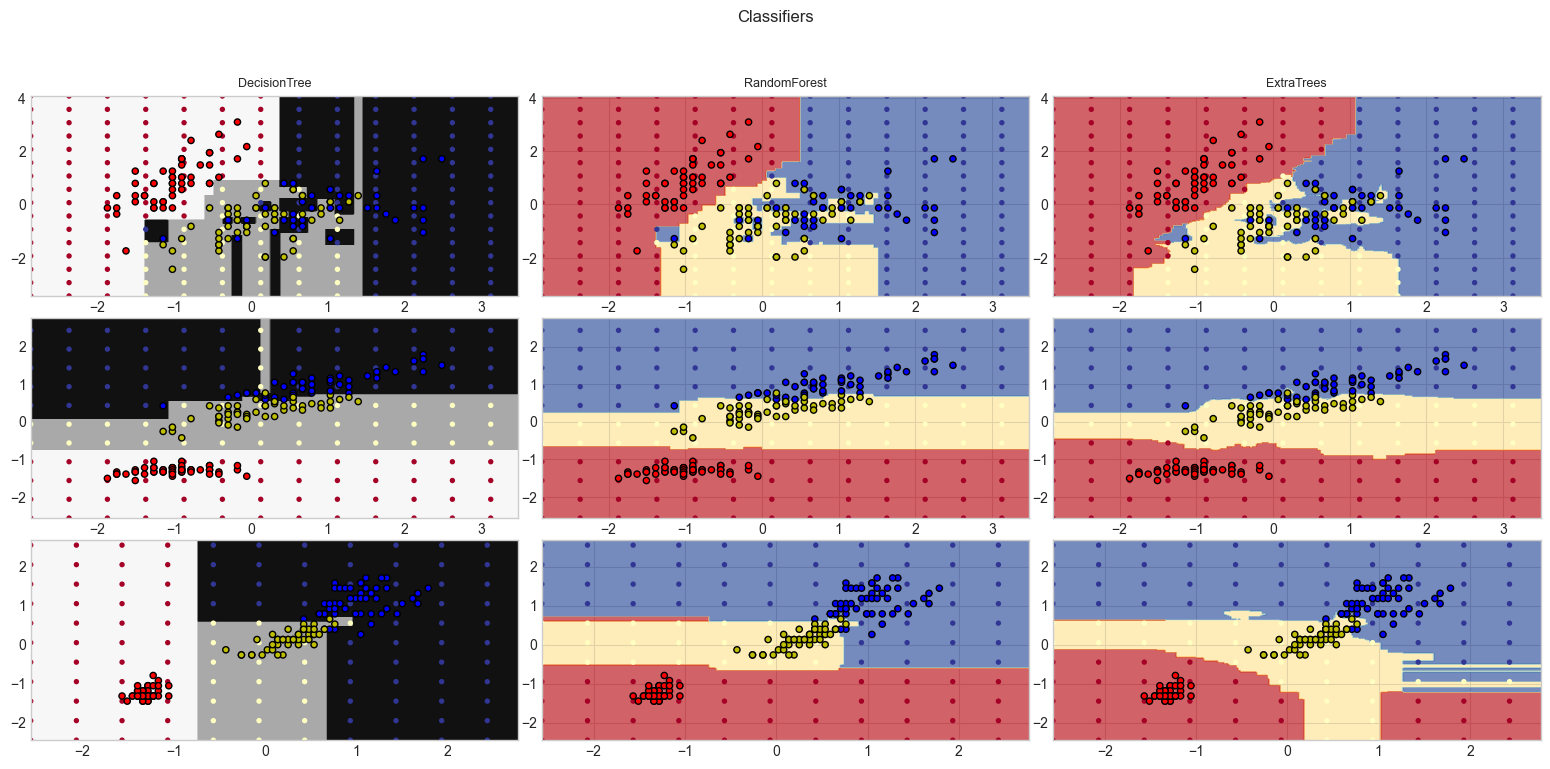

In [61]:
plt.figure(figsize=(16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        X= iris.data[:, pair]
        y= iris.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        model.fit(X, y)

        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
        y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
        
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, camp=cmap)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel(),]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap, edgecolors='none')

        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

In [62]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

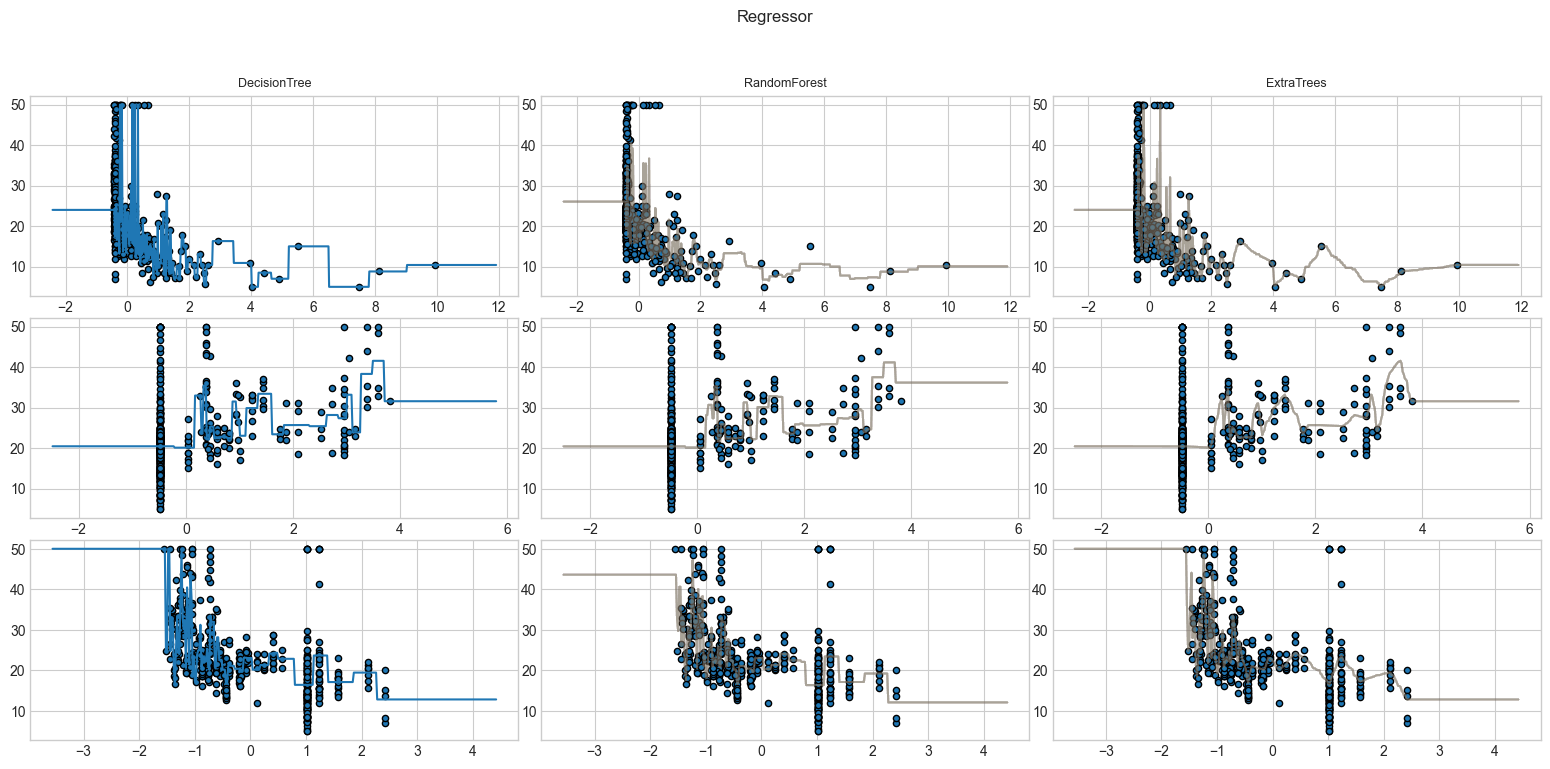

In [63]:
plt.figure(figsize=(16, 8))

for pair in (0, 1, 2):
    for model in models:
        X= boston.data[:, pair]
        y= boston.target

        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        model.fit(X.reshape(-1, 1), y)

        model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        x_min, x_max = X.min()-1, X.max()+1
        y_min, y_max = X.min()-1, X.max()+1
        
        xx, yy = np.arange(x_min-1, x_max+1, plot_step),\
                 np.arange(y_min-1, y_max+1, plot_step)

        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else:
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = model.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha=estimator_alpha)

        plt.scatter(X, y, edgecolor='k', s=20)
        plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5);

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_001.png)

In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [65]:
model = make_pipeline(StandardScaler(), AdaBoostClassifier())

In [66]:
# iris
cross_val = cross_validate(estimator=model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03611350059509277 (+/- 0.0012690196842737372)
avg score time: 0.004000997543334961 (+/- 3.2340669551493016e-07)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [67]:
# wine
cross_val = cross_validate(estimator=model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03978495597839356 (+/- 0.0007659006528307938)
avg score time: 0.0039028644561767576 (+/- 0.0004923133268317642)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [68]:
# 유방암
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0863504409790039 (+/- 0.003564807656131765)
avg score time: 0.004501819610595703 (+/- 0.0004476085668708291)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [69]:
model = make_pipeline(StandardScaler(), AdaBoostRegressor())

In [70]:
# boston
cross_val = cross_validate(estimator=model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05132999420166016 (+/- 0.0033981904931168613)
avg score time: 0.0020003318786621094 (+/- 3.015782985847835e-07)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [71]:
# diabetes
cross_val = cross_validate(estimator=model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.046608352661132814 (+/- 0.0017187803001012184)
avg score time: 0.0024024486541748048 (+/- 0.00037465449641397767)
avg test score: 0.40468492615091217 (+/- 0.05503550702683501)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [73]:
model = make_pipeline(StandardScaler(), GradientBoostingClassifier())

In [74]:
# iris
cross_val = cross_validate(estimator=model,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12678704261779786 (+/- 0.001057840259561277)
avg score time: 0.0010000228881835937 (+/- 0.0006328624835285516)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [75]:
# wine
cross_val = cross_validate(estimator=model,
                           X=wine.data, y=wine.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.17800550460815429 (+/- 0.0023347419629229805)
avg score time: 0.0007008075714111328 (+/- 0.000600942484598083)
avg test score: 0.9330158730158731 (+/- 0.03296317528191366)


In [76]:
# 유방암
cross_val = cross_validate(estimator=model,
                           X=cancer.data, y=cancer.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.24860501289367676 (+/- 0.002982433044352069)
avg score time: 0.0005008220672607422 (+/- 0.0004475552416258075)
avg test score: 0.9613724576929048 (+/- 0.022574828498321483)


### Gradient Tree Boosting 회귀

In [77]:
model = make_pipeline(StandardScaler(), GradientBoostingRegressor())

In [78]:
# boston
cross_val = cross_validate(estimator=model,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07371172904968262 (+/- 0.0016393616464341083)
avg score time: 0.0007009506225585938 (+/- 0.000399652865269487)
avg test score: 0.6744024115508018 (+/- 0.16889135839493458)


In [79]:
# diabetes
cross_val = cross_validate(estimator=model,
                           X=diabetes.data, y=diabetes.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05332140922546387 (+/- 0.0008095004553408706)
avg score time: 0.00020003318786621094 (+/- 0.0004000663757324219)
avg test score: 0.4078813692272544 (+/- 0.06959049679631404)


### 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [80]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [81]:
# hard vote
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='hard'
)

In [82]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [83]:
# soft vote
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting='soft', weights=[2, 1, 2]
)

In [84]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.96 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


##### 결정 경계 시각화

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [86]:
X = iris.data[:, [0, 2]]
y = iris.target

In [87]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting='soft', weights=[2, 1, 2])

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [88]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

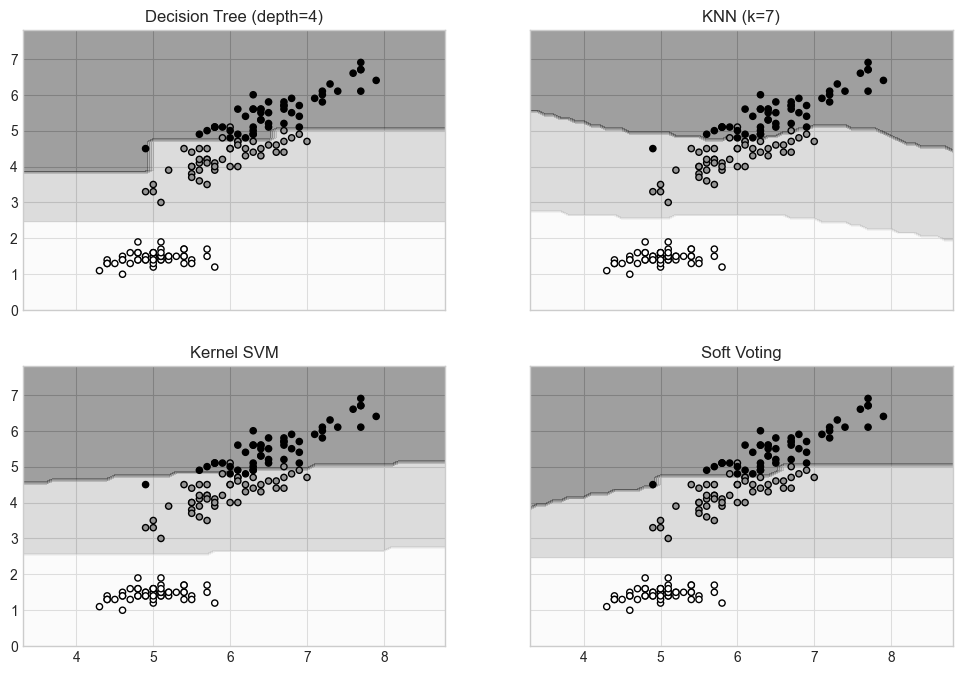

In [89]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 투표 기반 회귀 (Voting Regressor)
  * 서로 다른 모델의 예측 값의 평균을 사용

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [91]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

In [92]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 0.35 (+/- 0.38) [LinearRegression]
Accuracy: 0.67 (+/- 0.17) [GradientBoostingRegressor]
Accuracy: 0.62 (+/- 0.20) [RandomForestRegressor]
Accuracy: 0.66 (+/- 0.20) [VotingRegressor]


##### 회귀식 시각화

In [93]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [94]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1, 1, 1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [95]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

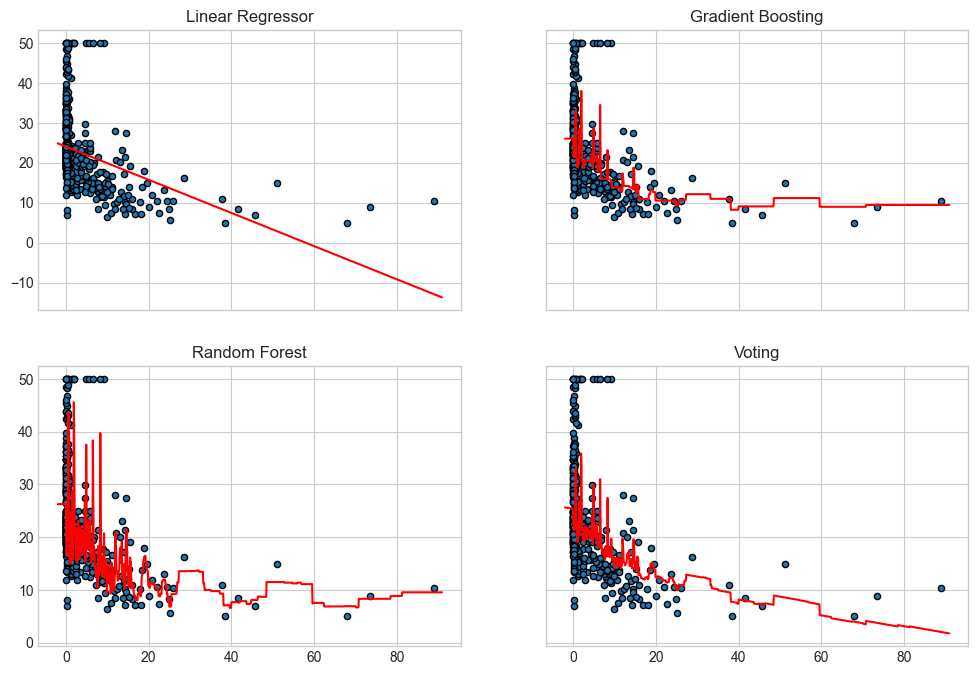

In [96]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regressor', 'Gradient Boosting',
                           'Random Forest', 'Voting']):
    Z = model.predict(xx.reshape(-1, 1))

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 일반화 (Stacked Generalization)
* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적
##### 스택 회귀

In [97]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [98]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [99]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [100]:
# boston
cross_val = cross_validate(estimator=reg,
                           X=boston.data, y=boston.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0751378059387207 (+/- 0.001154122737074951)
avg score time: 0.003506040573120117 (+/- 0.0003163376880664262)
avg test score: 0.3250910186025651 (+/- 0.33602830361454683)


##### 회귀식 시각화

In [101]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [102]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator=GradientBoostingRegressor()
    )

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

In [103]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1, x_max+1, 0.1)

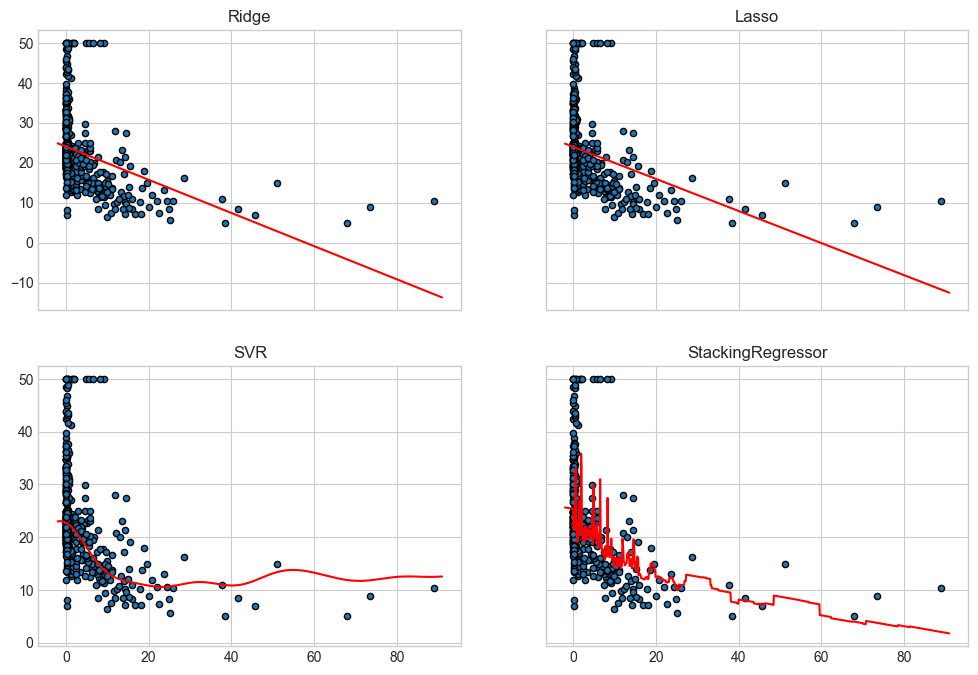

In [104]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'StackingRegressor']):
    Z = model.predict(xx.reshape(-1, 1))

    axarr[idx[0], idx[1]].plot(xx, Z, c='r')
    axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

##### 스택 분류

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [106]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [107]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

In [108]:
# boston
cross_val = cross_validate(estimator=clf,
                           X=iris.data, y=iris.target, cv=5)

print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.15826873779296874 (+/- 0.00515925566885978)
avg score time: 0.00700531005859375 (+/- 0.0006342569943163937)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


##### 결정 경계 시각화

In [109]:
X = iris.data[:, [0, 2]]
y = iris.target

In [110]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [111]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

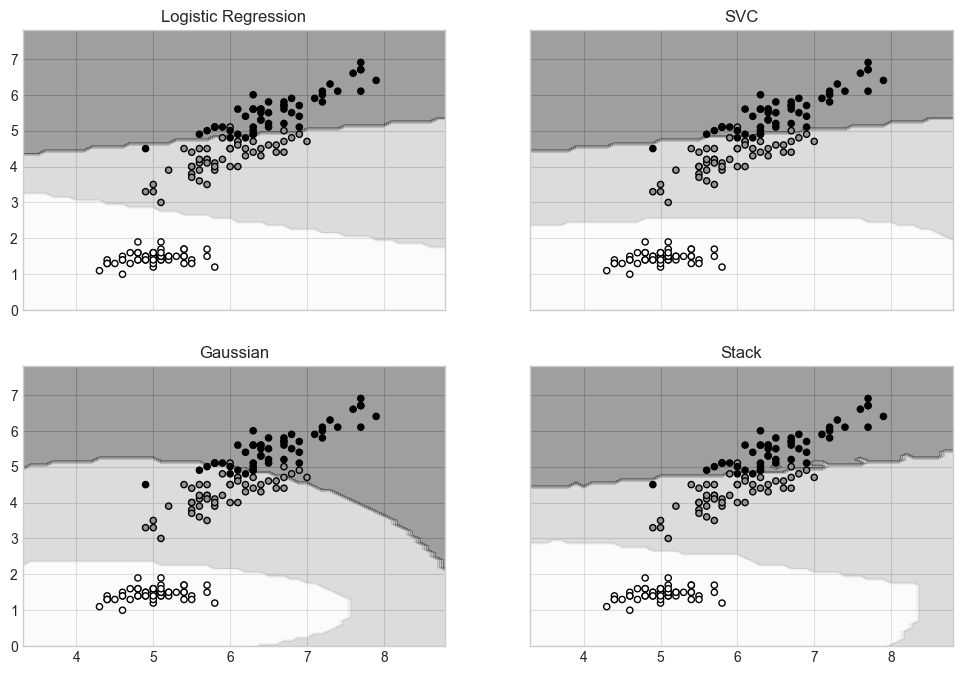

In [112]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC',
                           'Gaussian', 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()